In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# Read data

In [2]:
df = pd.read_csv('../data/news_2020.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   News    366 non-null    object
 1   Date    366 non-null    object
dtypes: object(2)
memory usage: 5.8+ KB


In [4]:
df.head()

News  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    [b'Shivin Narang injures his hand on the set of his show', b'Allergy cases on the rise in Bengaluru', b'A grand Hanukkah celebration held in the city', b'I respect my competitors, because they bring out the best in me: Yash', b'Strong New Year resolutions keep young minds motivated', b'Bhuvann Ponnannaa gets a surprise birthday pool party', b'Hiphop Adhi sings a lively kuthu song', b'Music helped me find my purpose in life, says Bindhumalini', b'Bengaluru students wish for peace and a greener planet', b'I found peace and clos

# Clean data

In [5]:
def get_news_list(text):
    news_list = []
    text = text.strip('][')
    for t in text.split(','):
        tokens = t.strip('\'\'')
        news_list.append(tokens) 
    return news_list

In [6]:
df['news_list'] = df['News'].apply(lambda x :get_news_list(x))

In [7]:
def get_individual_news(news):
    global actual_df
    for i in news:
        temp = {'News':i}
        actual_df = actual_df.append(temp, ignore_index=True)

In [8]:
actual_df = pd.DataFrame(columns={'News'})
df['news_list'].apply(lambda x :get_individual_news(x))

0      None
1      None
2      None
3      None
4      None
       ... 
361    None
362    None
363    None
364    None
365    None
Name: news_list, Length: 366, dtype: object

In [9]:
actual_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239018 entries, 0 to 239017
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   News    239018 non-null  object
dtypes: object(1)
memory usage: 1.8+ MB


In [10]:
actual_df.head()

,News
0,b'Shivin Narang injures his hand on the set of his show
1,b'Allergy cases on the rise in Bengaluru
2,b'A grand Hanukkah celebration held in the city
3,b'I respect my competitors
4,because they bring out the best in me: Yash


In [25]:
actual_df.drop_duplicates(subset ="News", inplace = True) 

In [26]:
actual_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226765 entries, 0 to 239017
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   News        226765 non-null  object
 1   clean_news  226765 non-null  object
dtypes: object(2)
memory usage: 5.2+ MB


In [61]:
pattern1 = r"\xe2\x80\x98"
pattern2 = r"\xe2\x80\x99"

In [71]:
def clean_text(text): 
    # remove html entities
    text = re.sub(r"&+\w*;+"," ", text)
    # make lower
    text = text.lower()
    # remove bold tag
    text = re.sub(r"b'| b\"",'', text)
    # remove extra space
    text = ' '.join([i for i in text.split() if len(i)>2])
    return text

In [45]:
def remove_unicode(text):
    string_encode = text.encode("ascii", "ignore")
    string_decode = string_encode.decode("utf-8")
    print(string_decode)
    return string_decode

In [35]:
clean_text("b'CM: Central agencies \xe2\x80\x98working overtime for political bosses\xe2\x80\x99")

'cm: central agencies \x80\x98working overtime for political bosses\x80\x99'

In [63]:
actual_df['clean_news'] = actual_df['News'].apply(lambda x: clean_text(x))

In [69]:
actual_df['clean_news'].sample(5)

77502                  \xe2\x80\x98strays and pets not spread covid-19
113721                            alarming rise madurai's covid cases"
68317             civic body moves stranded special camps and shelters
2190                   drl gets shareholder nod merge drhl into itself
2185      ranji trophy: assam put 237/5 against u\xe2\x80\x99khand day
Name: clean_news, dtype: object

In [70]:
actual_df['clean_news'][226631]

'first \\xe2\\x80\\x98black box\\xe2\\x80\\x99 theatre pune with flexible seating surprise hit'

In [37]:
def createWordCloud(data):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(' '.join(data))
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

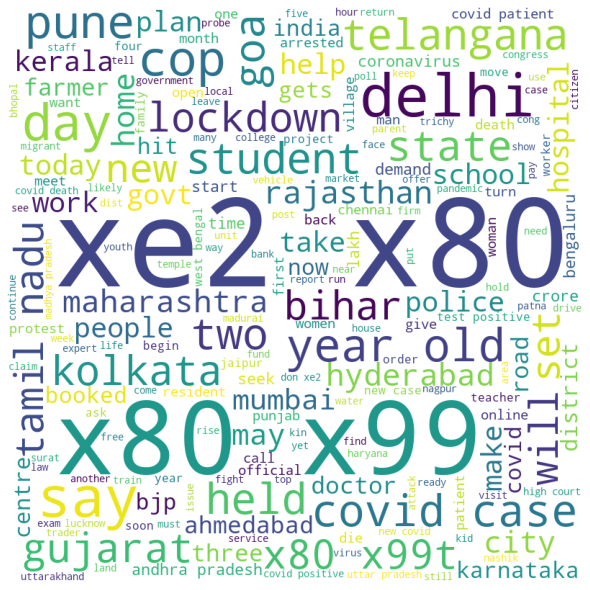

In [38]:
createWordCloud(actual_df['clean_news'])